In [108]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import random as rd

In [145]:
dataset = pd.read_csv('air_bnb.csv')
#Load Dataset
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


In [143]:
dataset.isnull().sum()
#Mencari total dataset dengan nilai null

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [112]:
print(len(dataset))
dataset.drop_duplicates()
print(len(dataset))
#mencari dan drop data yang duplikat

22552
22552


In [113]:
idx = []
idx.extend(dataset[dataset['name'].isnull()].index.tolist())
#Mengumpulkan index dari data null atribute name
idx.extend(dataset[dataset['host_name'].isnull()].index.tolist())
#Mengumpulkan index dari data null atribute host_name
idx.extend(dataset[dataset['last_review'].isnull()].index.tolist())
#Mengumpulkan index dari data null atribute last_review
idx.extend(dataset[dataset['reviews_per_month'].isnull()].index.tolist())
#Mengumpulkan index dari data null atribute reviews_per_month
idx = list(dict.fromkeys(idx))
#Penghapusan data yang duplikat dalam list idx
len(idx)

3971

Counter({'Friedrichshain-Kreuzberg': 4589, 'Mitte': 3821, 'Pankow': 2949, 'Neukölln': 2900, 'Tempelhof - Schöneberg': 1283, 'Charlottenburg-Wilm.': 1282, 'Lichtenberg': 529, 'Treptow - Köpenick': 477, 'Steglitz - Zehlendorf': 350, 'Reinickendorf': 199, 'Marzahn - Hellersdorf': 114, 'Spandau': 94})


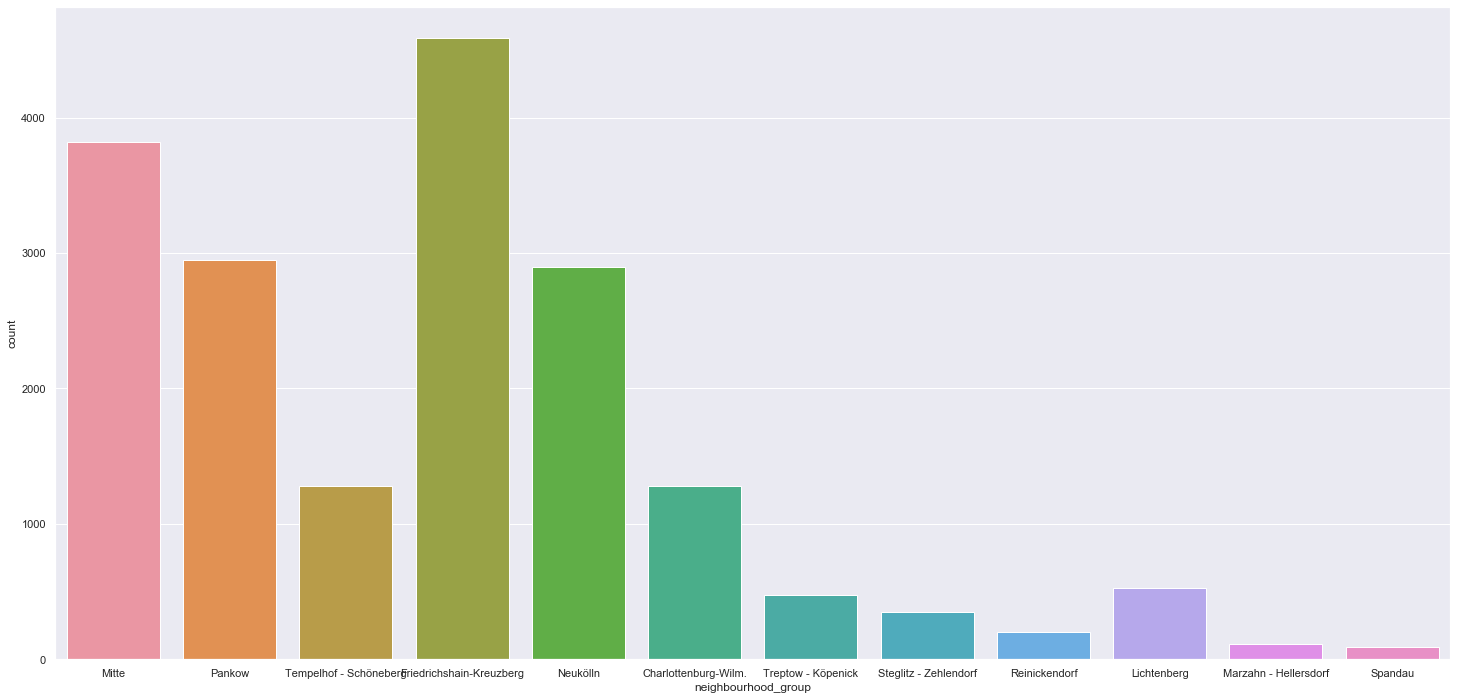

In [762]:
import seaborn as sns
from numpy import median
ng = dataset.iloc[:,[4]]
print(Counter(ng["neighbourhood_group"]))
#menghitung jumlah atribut
sns.set(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(25,12)})
ax = sns.countplot(x=ng["neighbourhood_group"], data=ng)
#barplot informasi neighbourhood_group

Counter({'Private room': 9534, 'Entire home/apt': 8835, 'Shared room': 218})


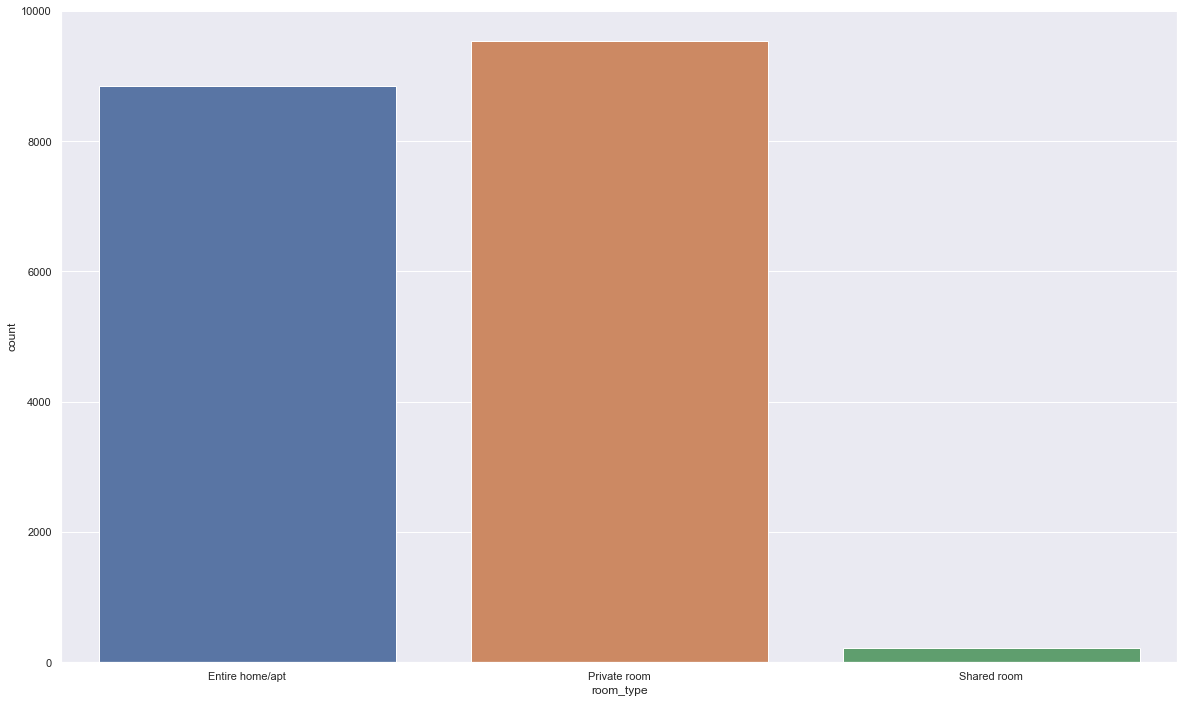

In [763]:
import seaborn as sns
from numpy import median
ng = dataset.iloc[:,[8]]
print(Counter(ng["room_type"]))
#menghitung jumlah atribut
sns.set(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.countplot(x=ng["room_type"], data=ng)
#Barplot informasi room_type

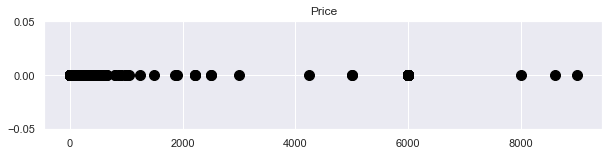

In [156]:
from matplotlib.pyplot import figure
figure(figsize=(10,2))
ng = dataset.iloc[:,[9]]
y = []
for i in range(len(ng)):
    y.append(0)
plt.scatter(ng, y, s = 100, c = 'black')
plt.title('Price')
plt.show()
#Plot data price untuk mencari data yang tidak biasa

In [167]:
unusualPrice = []
unusualPrice.extend(dataset[dataset['price'] > 2000].index.tolist())
#memasukan index data tersebut jika diatas 2000
unusualPrice.sort()
print(unusualPrice)

[766, 1990, 4117, 4573, 4744, 6655, 9528, 15665, 16915, 17250, 19372, 19373, 19407, 19409, 19410, 19411, 19412, 19413, 19414, 19415, 19655, 19656, 19657, 19658, 19659, 19660, 19661, 19662, 19663, 19700, 19729, 21389]


In [168]:
dataUnusualPrice = []
for i in range (len(unusualPrice)):
    print(dataset.iloc[unusualPrice[i],:])
#melihat informasi data

id                                                810056
name                              20m2 of relaxation ***
host_id                                          4259960
host_name                                      Sébastien
neighbourhood_group                               Pankow
neighbourhood                             Helmholtzplatz
latitude                                         52.5401
longitude                                        13.4219
room_type                                   Private room
price                                               2228
minimum_nights                                         1
number_of_reviews                                     53
last_review                                   2018-01-15
reviews_per_month                                   0.74
calculated_host_listings_count                         4
availability_365                                       0
Name: 766, dtype: object
id                                                             

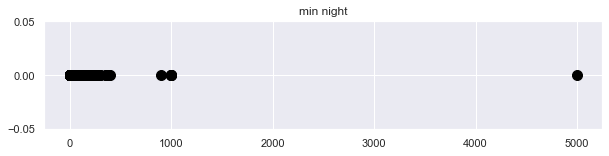

In [169]:
from matplotlib.pyplot import figure
from pylab import *
figure(figsize=(10,2))
ng = dataset.iloc[:,[10]]
y = []
for i in range(len(ng)):
    y.append(0)
plt.scatter(ng, y, s = 100, c = 'black')
plt.title('min night')
plt.show()
#Plot data min night untuk mencari data yang tidak biasa

In [172]:
unusualminNight = []
unusualminNight.extend(dataset[dataset['minimum_nights'] > 600].index.tolist())
print(unusualminNight)

[1103, 4344, 5490, 9935, 11163, 18930]


In [174]:
for i in range (len(unusualminNight)):
    print(dataset.iloc[unusualminNight[i],:])
#melihat informasi data

id                                                        1272110
name                              2-story-Altbau-Apt with balcony
host_id                                                   6923567
host_name                                                     Ron
neighbourhood_group                                        Pankow
neighbourhood                                 Prenzlauer Berg Süd
latitude                                                  52.5365
longitude                                                 13.4315
room_type                                         Entire home/apt
price                                                          75
minimum_nights                                               1000
number_of_reviews                                               9
last_review                                            2017-06-03
reviews_per_month                                            0.14
calculated_host_listings_count                                  4
availabili

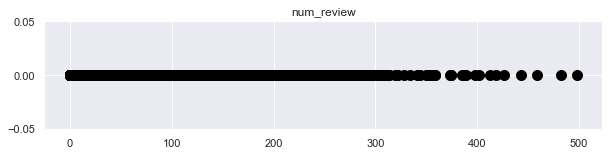

In [175]:
from matplotlib.pyplot import figure
from pylab import *
figure(figsize=(10,2))
ng = dataset.iloc[:,[11]]
y = []
for i in range(len(ng)):
    y.append(0)
plt.scatter(ng, y, s = 100, c = 'black')
plt.title('num_review')
plt.show()
#Plot data num_review untuk mencari data yang tidak biasa

In [179]:
unusualReview = []
unusualReview.extend(dataset[dataset['number_of_reviews'] > 450].index.tolist())
print(unusualReview)

[327, 487, 606]


In [180]:
for i in range (len(unusualReview)):
    print(dataset.iloc[unusualReview[i],:])
#melihat informasi data

id                                                      292864
name                              Lounge Room –  Alex in 5 Min
host_id                                                 286494
host_name                                            Project A
neighbourhood_group                                     Pankow
neighbourhood                          Prenzlauer Berg Südwest
latitude                                                 52.53
longitude                                              13.4176
room_type                                         Private room
price                                                       50
minimum_nights                                               1
number_of_reviews                                          498
last_review                                         2018-10-24
reviews_per_month                                         6.29
calculated_host_listings_count                               3
availability_365                                       

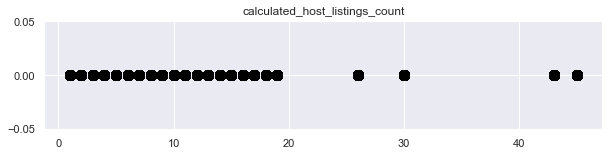

In [181]:
from matplotlib.pyplot import figure
from pylab import *
figure(figsize=(10,2))
ng = dataset.iloc[:,[14]]
y = []
for i in range(len(ng)):
    y.append(0)
plt.scatter(ng, y, s = 100, c = 'black')
plt.title('calculated_host_listings_count')
plt.show()
#Plot data calculated_host_listings_count untuk mencari data yang tidak biasa

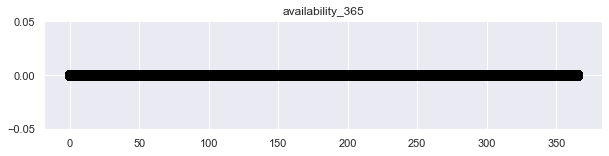

In [183]:
from matplotlib.pyplot import figure
from pylab import *
figure(figsize=(10,2))
ng = dataset.iloc[:,[15]]
y = []
for i in range(len(ng)):
    y.append(0)
plt.scatter(ng, y, s = 100, c = 'black')
plt.title('availability_365')
plt.show()
#Plot data availability_365 untuk mencari data yang tidak biasa

In [124]:
#terdapat 3 list yang memiliki data tidak biasa
unusualData = []
unusualData.extend(unusualPrice)
unusualData.extend(unusualminNight)
unusualData.extend(unusualReview)
unusualData.extend(idx)
unusualData = list(dict.fromkeys(unusualData))
unusualData.sort(reverse = True)
#Memasukan seluruh data yang tidak biasa dan bernilai null
#Tidak digunakan karena listing tetap ditemukan pada situs airbnb ada di laporan untuk penjelasan
# unusualData

In [184]:
nullValue = []
nullValue.extend(dataset[dataset['name'].isnull()].index.tolist())
#Mengumpulkan index dari data null atribute name
nullValue.extend(dataset[dataset['host_name'].isnull()].index.tolist())
#Mengumpulkan index dari data null atribute host_name
nullValue.extend(dataset[dataset['last_review'].isnull()].index.tolist())
#Mengumpulkan index dari data null atribute last_review
nullValue.extend(dataset[dataset['reviews_per_month'].isnull()].index.tolist())
#Mengumpulkan index dari data null atribute reviews_per_month
nullValue = list(dict.fromkeys(nullValue))
#Penghapusan data yang duplikat dalam list idx
len(nullValue)

3965

In [185]:
#delete null
print("Awal: ", len(dataset))
dataset.drop(nullValue, inplace = True)
print("Akhir: ", len(dataset))
print(dataset.isnull().sum())
print(dataset.info())

Awal:  22552
Akhir:  18587
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18587 entries, 0 to 22536
Data columns (total 16 columns):
id                                18587 non-null int64
name                              18587 non-null object
host_id                           18587 non-null int64
host_name                         18587 non-null object
neighbourhood_group               18587 non-null obje

In [188]:
#end preprocessing
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22449,29772631,Cosy and lovely room near Ostkreuz,20727291,Anna,Lichtenberg,Neu Lichtenberg,52.502952,13.490870,Private room,25,2,1,2018-11-04,1.00,1,32
22463,29784461,House on the water HT10 - Heart of East Berlin,22437698,Sebastian,Treptow - Köpenick,Oberschöneweide,52.457982,13.526945,Entire home/apt,99,1,5,2018-11-06,5.00,2,339
22475,29792124,Welcome to Light Apartment,224133729,Inna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.507884,13.467071,Private room,25,1,1,2018-11-05,1.00,1,8
22508,29817383,Prenzlauerberg,224295751,Salem,Pankow,Prenzlauer Berg Nordwest,52.552250,13.410904,Entire home/apt,70,1,1,2018-11-07,1.00,1,350


In [466]:
klasifikasiDataset = dataset.copy()
klasifikasiDataset = klasifikasiDataset.drop(['id', 'name', 'host_id', 'host_name' ,'latitude','longitude','last_review'], axis = 1)
#Penghapusan atribut yang dapat mengurangi akurasi

In [467]:
klasifikasiDataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,3.76,4,141
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,1.42,1,0
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,1.25,1,220
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,0.39,1,297
4,Pankow,Helmholtzplatz,Private room,42,2,197,1.75,1,26
...,...,...,...,...,...,...,...,...,...
22449,Lichtenberg,Neu Lichtenberg,Private room,25,2,1,1.00,1,32
22463,Treptow - Köpenick,Oberschöneweide,Entire home/apt,99,1,5,5.00,2,339
22475,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,Private room,25,1,1,1.00,1,8
22508,Pankow,Prenzlauer Berg Nordwest,Entire home/apt,70,1,1,1.00,1,350


In [468]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
klasifikasiDataset.iloc[:, [0]] = labelencoder.fit_transform(klasifikasiDataset.iloc[:, [0]])
#label encoder digunakan untuk membantu dalam kalkulasi feature selection dalam atribut neighbourhood_group
klasifikasiDataset.iloc[:, [1]] = labelencoder.fit_transform(klasifikasiDataset.iloc[:, [1]])
#label encoder digunakan untuk membantu dalam kalkulasi feature selection dalam atribut neighbourhood
klasifikasiDataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4,18,Entire home/apt,60,4,118,3.76,4,141
1,6,95,Private room,17,2,6,1.42,1,0
2,6,98,Entire home/apt,90,62,143,1.25,1,220
3,10,110,Private room,26,5,25,0.39,1,297
4,6,49,Private room,42,2,197,1.75,1,26
...,...,...,...,...,...,...,...,...,...
22449,2,76,Private room,25,2,1,1.00,1,32
22463,11,84,Entire home/apt,99,1,5,5.00,2,339
22475,1,32,Private room,25,1,1,1.00,1,8
22508,6,95,Entire home/apt,70,1,1,1.00,1,350


In [469]:
print(Counter(klasifikasiDataset["room_type"]))
#Menghitung record room_type

Counter({'Private room': 9534, 'Entire home/apt': 8835, 'Shared room': 218})


In [272]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
atr2Sellect = klasifikasiDataset.iloc[:,[0,1,3,4,5,6,7,8]]
#Pengambilan keseluruhan atribut untuk dicari pengaruhnya terhadap atribut kelas
cls2Sellect = klasifikasiDataset.iloc[:,2]
#atribut kelas yaitu room_type
#penggunaan SelectKBest class untuk mencari fitur terbaik
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(atr2Sellect,cls2Sellect)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(atr2Sellect.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attribute','Score']  #Menamai Kolom
print(featureScores.nlargest(8,'Score'))  #print fitur terbaik secara terurut

                        Attribute          Score
2                           price  110633.472797
7                availability_365   40870.313145
3                  minimum_nights   21912.773781
6  calculated_host_listings_count    6737.238408
4               number_of_reviews    2311.423426
1                   neighbourhood     849.311030
5               reviews_per_month      27.042953
0             neighbourhood_group      18.783984


In [273]:
prosesKlasifikasi = klasifikasiDataset.copy()

In [274]:
#start of decision tree

In [471]:
#prediksi Room type
#Dengan price, availability_365, dan minimum_nights 
#Kelas adalah room_type
X = prosesKlasifikasi.iloc[:, [3, 8, 4]].values
y = prosesKlasifikasi.iloc[:, 2].values

In [483]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
#X_train merupakan atribut fitur yang akan menjadi data latih
#y_train merupakan kelasnya
#X_test nantinya digunakan untuk melakukan prediksi dari model yang telah digunakan
#y_test adalah kelas yang akan dibandingkan dengan hasil prediksi

In [507]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#penggunakan library DecisionTreeClassifier dari sklearn
classifier.fit(X_train, y_train)
#melakukan pemodelan

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [508]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [509]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#memberikan report hasil evaluasi

[[1343  379    2]
 [ 445 1486   19]
 [   6   28   10]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1724
           1       0.78      0.76      0.77      1950
           2       0.32      0.23      0.27        44

    accuracy                           0.76      3718
   macro avg       0.62      0.59      0.60      3718
weighted avg       0.76      0.76      0.76      3718



In [510]:
#Accuracy CM
acc = sum(cm.diagonal()) / sum(cm[0] + cm[1] + cm[2])
print("Accuracy: ", acc)
#Precission 
PrecissionA = cm[0][0] / sum(cm[0])
print("Precission A: ", PrecissionA)
PrecissionB = cm[1][1] / sum(cm[1])
print("Precission B: ", PrecissionB)
PrecissionC = cm[2][2] / sum(cm[2])
print("Precission C: ", PrecissionC)
#Recall
recA = cm[0][0] / sum(cm[:,0])
print("Recall A: ", recA)
recB = cm[1][1] / sum(cm[:,1])
print("Recall B: ", recB)
recC = cm[2][2] / sum(cm[:,2])
print("Recall C: ", recC)

Accuracy:  0.7635825712748789
Precission A:  0.7790023201856149
Precission B:  0.762051282051282
Precission C:  0.22727272727272727
Recall A:  0.7486064659977704
Recall B:  0.7849973586899102
Recall C:  0.3225806451612903


In [511]:
#end of decision tree

In [ ]:
#Start of KNN

In [512]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=500).fit(X_train,y_train)
#penggunakan library KNeighborsClassifier dari sklearn dengan jumlah N sebanyak 500
classifier.fit(X_train, y_train)
#melakukan pemodelan
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [513]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#memberikan report hasil evaluasi

[[1336  388    0]
 [ 340 1610    0]
 [   4   40    0]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1724
           1       0.79      0.83      0.81      1950
           2       0.00      0.00      0.00        44

    accuracy                           0.79      3718
   macro avg       0.53      0.53      0.53      3718
weighted avg       0.78      0.79      0.79      3718



C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [514]:
#Accuracy CM
acc = sum(cm.diagonal()) / sum(cm[0] + cm[1] + cm[2])
print("Accuracy: ", acc)
#Precission 
PrecissionA = cm[0][0] / sum(cm[0])
print("Precission A: ", PrecissionA)
PrecissionB = cm[1][1] / sum(cm[1])
print("Precission B: ", PrecissionB)
PrecissionC = cm[2][2] / sum(cm[2])
print("Precission C: ", PrecissionC)
#Recall
recA = cm[0][0] / sum(cm[:,0])
print("Recall A: ", recA)
recB = cm[1][1] / sum(cm[:,1])
print("Recall B: ", recB)
recC = cm[2][2] / sum(cm[:,2])
print("Recall C: ", recC)

Accuracy:  0.792361484669177
Precission A:  0.7749419953596288
Precission B:  0.8256410256410256
Precission C:  0.0
Recall A:  0.7952380952380952
Recall B:  0.7899901864573111
Recall C:  nan


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  app.launch_new_instance()


In [432]:
#clustering

In [41]:
#k Means

In [515]:
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22449,29772631,Cosy and lovely room near Ostkreuz,20727291,Anna,Lichtenberg,Neu Lichtenberg,52.502952,13.490870,Private room,25,2,1,2018-11-04,1.00,1,32
22463,29784461,House on the water HT10 - Heart of East Berlin,22437698,Sebastian,Treptow - Köpenick,Oberschöneweide,52.457982,13.526945,Entire home/apt,99,1,5,2018-11-06,5.00,2,339
22475,29792124,Welcome to Light Apartment,224133729,Inna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.507884,13.467071,Private room,25,1,1,2018-11-05,1.00,1,8
22508,29817383,Prenzlauerberg,224295751,Salem,Pankow,Prenzlauer Berg Nordwest,52.552250,13.410904,Entire home/apt,70,1,1,2018-11-07,1.00,1,350


In [795]:
clusteringDataset = dataset.copy()
clusteringDataset = clusteringDataset.drop(['id', 'name', 'host_id', 'host_name' ,'latitude','longitude','last_review'], axis = 1)

In [796]:
clusteringDataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,3.76,4,141
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,1.42,1,0
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,1.25,1,220
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,0.39,1,297
4,Pankow,Helmholtzplatz,Private room,42,2,197,1.75,1,26
...,...,...,...,...,...,...,...,...,...
22449,Lichtenberg,Neu Lichtenberg,Private room,25,2,1,1.00,1,32
22463,Treptow - Köpenick,Oberschöneweide,Entire home/apt,99,1,5,5.00,2,339
22475,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,Private room,25,1,1,1.00,1,8
22508,Pankow,Prenzlauer Berg Nordwest,Entire home/apt,70,1,1,1.00,1,350


In [797]:
X = clusteringDataset.iloc[:, [3, 4]].values
# atrA = MinMaxScaler().fit_transform(X[:,[0]])
# atrB = MinMaxScaler().fit_transform(X[:,[1]])
atrA = (X[:,[0]])
atrB = (X[:,[1]])
datanya = []
for i in range (len(atrA)):
    datanya.append([float(atrA[i]),float(atrB[i])])

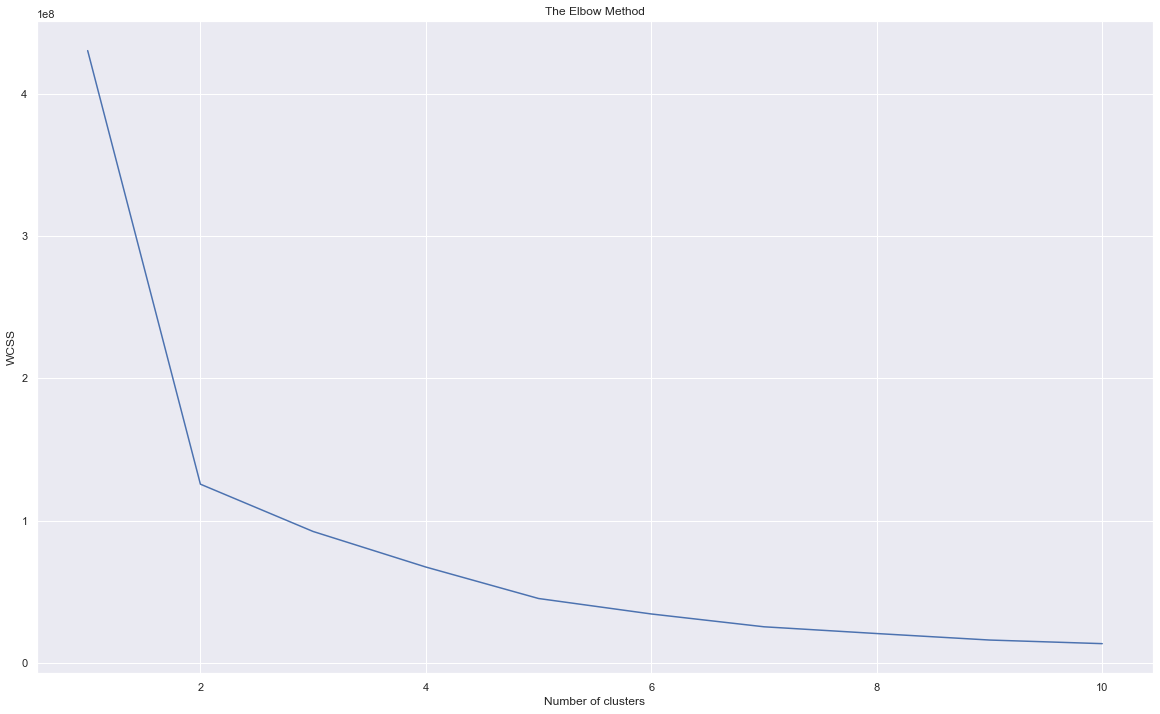

In [798]:
# # Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [799]:
#generate centroid
#inisiasi berapa cluster
# numofCLuster = 7
randnum = rd.sample(range(len(datanya)), numofCLuster)
#3 diatas adlah banyaknya clusters
centroid = []
for i in range(len(randnum)):
    centroid.append(datanya[randnum[i]])

In [800]:
stat = True
while stat:
    clusters = []
    clustersidx = []
    for i in range(len(centroid)):
        clusters.append([])
        clustersidx.append([])
        #assign tempat yang akan diisi tiap cluster
    for i in range(len(datanya)):
        jarak = []
        newCentroid = []
        for j in range(len(centroid)):
            hitungan = 0
            for k in range (2): 
#               nanti ubah
                hitungan += abs(datanya[i][k]-centroid[j][k])
                #perhitungan jarak menggunakan manhattan distance
            jarak.append(hitungan)
            #insert kedalam array nilai-nilai jarak dari tiap centroid
        minIdx = jarak.index(min(jarak))
        #mendapatkan index dari jarak paling rendah (centroid ke-minIdx)
#         for k in range (2): 
        clusters[minIdx].append(datanya[i])
        #insert data kedalam clusters tertentu
        #
        clustersidx[minIdx].append(i)
        #insert index kedalam clusters tertentu
    newCentroid = []
    for i in range(len(centroid)):
        totalAtr0 = 0
        totalAtr1 = 0
        #atur sebanyak atr
        for j in range(len(clusters[i])):
            totalAtr0 += clusters[i][j][0]
            totalAtr1 += clusters[i][j][1]
        newCentroid.append([totalAtr0/len(clusters[i]),totalAtr1/len(clusters[i])]) 
        #pembuatan centroid baru
    if centroid == newCentroid:
        stat = False
        #kondisi berhenti
    else:
        centroid = []
        centroid = newCentroid.copy()
        #kondisi centroid belum sama maka akan dilakukan iterasi lagi


In [801]:
plotCX = []
plotCY = []
for i in range(len(newCentroid)):
    plotCX.append(newCentroid[i][0])
    plotCY.append(newCentroid[i][1])
#plotting koordinat titik

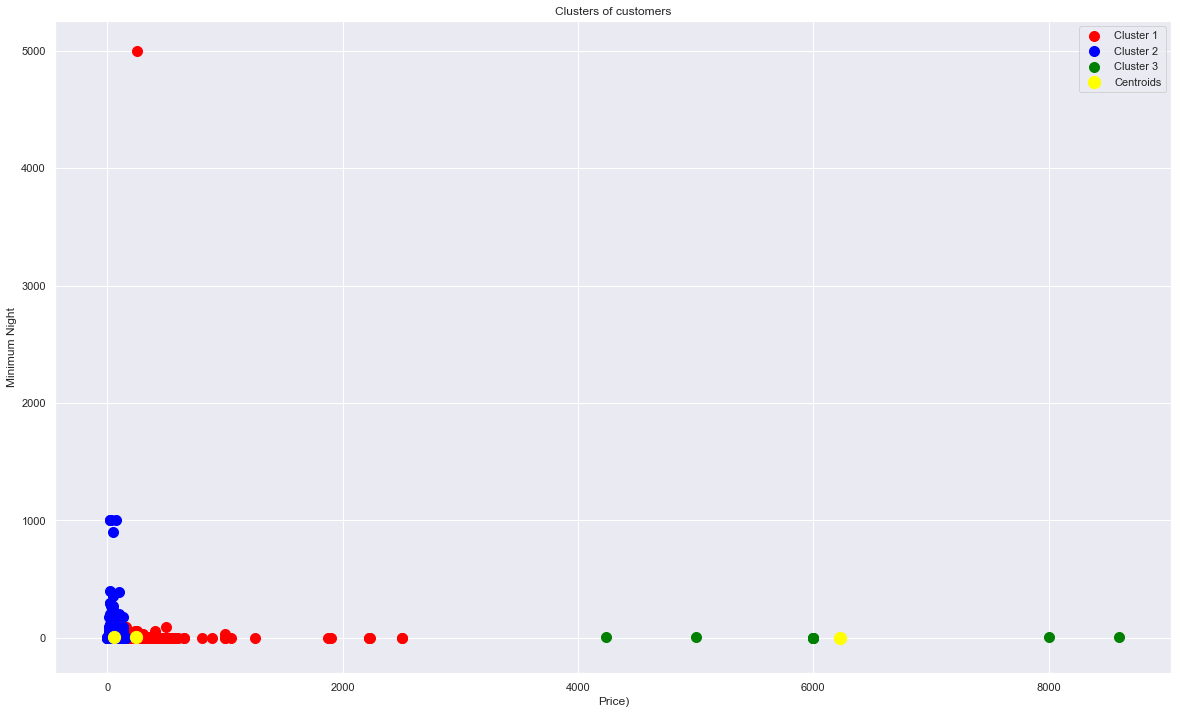

In [802]:
# figure(figsize=(100,100))
plt.scatter(X[clustersidx[0],[0]], X[clustersidx[0],[1]], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[clustersidx[1],[0]], X[clustersidx[1],[1]], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clustersidx[2],[0]], X[clustersidx[2],[1]], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[clustersidx[3],[0]], X[clustersidx[3],[1]], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clustersidx[4],[0]], X[clustersidx[4],[1]], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[clustersidx[5],[0]], X[clustersidx[5],[1]], s = 100, c = 'gray', label = 'Cluster 6')
plt.scatter(X[clustersidx[6],[0]], X[clustersidx[6],[1]], s = 100, c = 'brown', label = 'Cluster 7')
plt.scatter(plotCX, plotCY, s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Price)')
plt.ylabel('Minimum Night')
plt.legend()
plt.show()

In [803]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
label = np.zeros(len(X))
for i in range(len(clustersidx)):
    label[clustersidx[i]] = i
print("Calinski-Harabasz", metrics.calinski_harabasz_score(X, label))
print("Silhouette Coefficient", metrics.silhouette_score(X, label, metric='euclidean'))

Calinski-Harabasz 31065.541726573803
Silhouette Coefficient 0.7941953066199083


In [529]:
#Hierarki

In [725]:
clusteringDataset = dataset.copy()
clusteringDataset = clusteringDataset.drop(['id', 'name', 'host_id', 'host_name' ,'latitude','longitude','last_review'], axis = 1)

In [726]:
clusteringDataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,3.76,4,141
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,1.42,1,0
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,1.25,1,220
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,0.39,1,297
4,Pankow,Helmholtzplatz,Private room,42,2,197,1.75,1,26
...,...,...,...,...,...,...,...,...,...
22449,Lichtenberg,Neu Lichtenberg,Private room,25,2,1,1.00,1,32
22463,Treptow - Köpenick,Oberschöneweide,Entire home/apt,99,1,5,5.00,2,339
22475,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,Private room,25,1,1,1.00,1,8
22508,Pankow,Prenzlauer Berg Nordwest,Entire home/apt,70,1,1,1.00,1,350


In [727]:
print(Counter(clusteringDataset["neighbourhood_group"]))

Counter({'Friedrichshain-Kreuzberg': 4589, 'Mitte': 3821, 'Pankow': 2949, 'Neukölln': 2900, 'Tempelhof - Schöneberg': 1283, 'Charlottenburg-Wilm.': 1282, 'Lichtenberg': 529, 'Treptow - Köpenick': 477, 'Steglitz - Zehlendorf': 350, 'Reinickendorf': 199, 'Marzahn - Hellersdorf': 114, 'Spandau': 94})


In [728]:
idxNeigh = clusteringDataset[clusteringDataset['neighbourhood_group'] != "Spandau"].index.tolist()
clusteringDataset.drop(idxNeigh, inplace = True)
clusteringDataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
251,Spandau,Heerstraße Nord,Private room,40,1,26,0.34,1,322
529,Spandau,Gatow / Kladow,Private room,49,2,50,0.70,1,273
989,Spandau,Wilhelmstadt,Private room,77,1,13,0.31,2,364
1422,Spandau,Wilhelmstadt,Entire home/apt,55,4,35,0.62,1,270
2517,Spandau,Siemensstadt,Entire home/apt,50,30,4,0.08,2,341
...,...,...,...,...,...,...,...,...,...
21362,Spandau,Spandau Mitte,Shared room,91,1,1,0.55,1,58
21367,Spandau,Spandau Mitte,Private room,15,1,10,6.00,1,57
21518,Spandau,Wilhelmstadt,Private room,22,2,4,3.08,1,120
21781,Spandau,Falkenhagener Feld,Private room,16,1,2,1.87,1,302


In [729]:
X = clusteringDataset.iloc[:, [3, 4]].values
# atrA = MinMaxScaler().fit_transform(X[:,[0]])
# atrB = MinMaxScaler().fit_transform(X[:,[1]])
atrA = (X[:,[0]])
atrB = (X[:,[1]])
datanya = []
for i in range (len(atrA)):
    datanya.append([float(atrA[i]),float(atrB[i])])

In [730]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
mX = squareform(pdist(datanya))
# mX = squareform(X)
# print(mX)

In [731]:
#Inisiasi Cluster Awal
clusters = []
for i in range(len(X)):
    clusters.append([i])
# clusters
pCluster = len(X)
#nilai Cluster dapat dibuah disini
jumlahCluster = 7
while pCluster != jumlahCluster:
    close = []
    y, z = np.where( mX==np.min(mX[np.nonzero(mX)]))
    close.extend([y[-1],z[-1]])
    mustMerge = close
    #Mencari titik dari nilai terkecil pada distance matriks

    mergeClusters = []
#     print(mustMerge)
    mergeClusters.extend(clusters.pop(mustMerge[0]))
    mergeClusters.extend(clusters.pop(mustMerge[1]))                           
    clusters.append(mergeClusters)

    #Menyatukan Cluster Berdasarkan Titik

    A = mX[mustMerge[0]]
    A = np.delete(A, [mustMerge[0]], 0)
    A = np.delete(A, [mustMerge[1]], 0)
    B = mX[mustMerge[1]]
    B = np.delete(B, [mustMerge[0]], 0)
    B = np.delete(B, [mustMerge[1]], 0)
    insertThis = []
    temp = 0
    for i in range(len(A)):
    #       Start of Single Linkage
#         if A[i] <= B[i]:
#             insertThis = np.insert(insertThis, i, A[i])
#         else:
#             insertThis = np.insert(insertThis, i, B[i])
#         temp = i + 1
    #       End of Comlete Linkage

    #       Start of Comlete Linkage
            if A[i] >= B[i]:
                insertThis = np.insert(insertThis, i, A[i])
            else:
                insertThis = np.insert(insertThis, i, B[i])
            temp = i + 1
    #       End of Comlete Linkage

    #       Start of Average Linkage
#             insertThis = np.insert(insertThis,i, (A[i]+B[i])/2)
#             temp = i + 1
    #       End of Average Linkage

    insertThis = np.insert(insertThis, temp, 0)

    #Mencari nilai yang akan dimasukan ke distance Matrix

    mX = (np.delete(np.delete(mX, mustMerge[0], 0), mustMerge[0], 1))
    mX = (np.delete(np.delete(mX, mustMerge[1], 0), mustMerge[1], 1))

    #Delete distance matriks pada titik nilai minimal

    bMX = mX.copy()
    bMX = np.zeros((len(mX)+1,len(mX)+1))
    bMX[:-1,:-1] = mX
    bMX = np.insert(bMX,len(bMX)-1, insertThis, 0)
    bMX = np.delete(bMX, len(bMX)-1, axis = 0)
    bMX = np.insert(bMX,len(bMX)-1, insertThis, 1)
    bMX = np.delete(bMX, len(bMX), axis = 1)
    mX = bMX
#     print("iteration: ", pCluster)
    pCluster -= 1
    #Nilai distance matriks baru

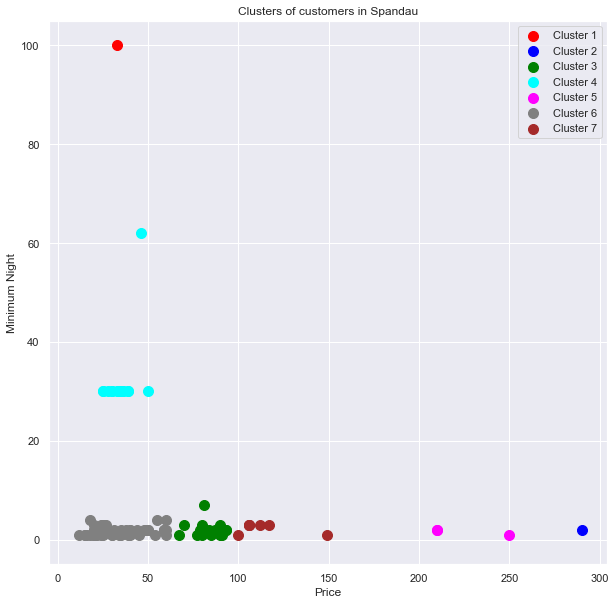

In [732]:
figure(figsize=(10,10))
plt.scatter(X[clusters[0],[0]], X[clusters[0],[1]], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters[1],[0]], X[clusters[1],[1]], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters[2],[0]], X[clusters[2],[1]], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters[3],[0]], X[clusters[3],[1]], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clusters[4],[0]], X[clusters[4],[1]], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[clusters[5],[0]], X[clusters[5],[1]], s = 100, c = 'gray', label = 'Cluster 6')
plt.scatter(X[clusters[6],[0]], X[clusters[6],[1]], s = 100, c = 'brown', label = 'Cluster 7')
plt.title('Clusters of customers in Spandau')
plt.xlabel('Price')
plt.ylabel('Minimum Night')
plt.legend()
plt.show()

In [736]:
label = np.zeros(len(X))
for i in range(len(clusters)):
    label[clusters[i]] = i
print("Calinski-Harabasz", metrics.calinski_harabasz_score(X, label))
print("Silhouette Coefficient", metrics.silhouette_score(X, label, metric='euclidean'))

Calinski-Harabasz 204.76587968825027
Silhouette Coefficient 0.5191917299025981


In [737]:
clusteringDataset = dataset.copy()
clusteringDataset = clusteringDataset.drop(['id', 'name', 'host_id', 'host_name' ,'latitude','longitude','last_review'], axis = 1)
print(Counter(clusteringDataset["neighbourhood_group"]))

Counter({'Friedrichshain-Kreuzberg': 4589, 'Mitte': 3821, 'Pankow': 2949, 'Neukölln': 2900, 'Tempelhof - Schöneberg': 1283, 'Charlottenburg-Wilm.': 1282, 'Lichtenberg': 529, 'Treptow - Köpenick': 477, 'Steglitz - Zehlendorf': 350, 'Reinickendorf': 199, 'Marzahn - Hellersdorf': 114, 'Spandau': 94})


In [780]:
idxNeigh = clusteringDataset[clusteringDataset['neighbourhood_group'] != "Lichtenberg"].index.tolist()
clusteringDataset.drop(idxNeigh, inplace = True)
clusteringDataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
113,Lichtenberg,Rummelsburger Bucht,Entire home/apt,59,1,28,0.35,2,16
156,Lichtenberg,Karlshorst,Entire home/apt,65,3,33,0.40,6,328
159,Lichtenberg,Alt-Lichtenberg,Private room,38,3,101,1.17,2,142
169,Lichtenberg,Neu Lichtenberg,Private room,49,2,129,1.49,1,21
541,Lichtenberg,Neu Lichtenberg,Entire home/apt,30,3,3,0.04,1,0
...,...,...,...,...,...,...,...,...,...
22065,Lichtenberg,Neu Lichtenberg,Private room,25,1,1,1.00,1,297
22081,Lichtenberg,Alt-Lichtenberg,Private room,35,5,1,1.00,1,252
22086,Lichtenberg,Neu Lichtenberg,Private room,30,2,3,3.00,1,4
22330,Lichtenberg,Alt-Hohenschönhausen Nord,Private room,27,1,3,3.00,1,21


In [781]:
X = clusteringDataset.iloc[:, [3, 4]].values
# atrA = MinMaxScaler().fit_transform(X[:,[0]])
# atrB = MinMaxScaler().fit_transform(X[:,[1]])
atrA = (X[:,[0]])
atrB = (X[:,[1]])
datanya = []
for i in range (len(atrA)):
    datanya.append([float(atrA[i]),float(atrB[i])])

In [782]:
mX = squareform(pdist(datanya))
# mX = squareform(X)
# print(mX)

In [783]:
#Inisiasi Cluster Awal
clusters = []
for i in range(len(X)):
    clusters.append([i])
# clusters
pCluster = len(X)
#nilai Cluster dapat dibuah disini
jumlahCluster = 7
while pCluster != jumlahCluster:
    close = []
    y, z = np.where( mX==np.min(mX[np.nonzero(mX)]))
    close.extend([y[-1],z[-1]])
    mustMerge = close
    #Mencari titik dari nilai terkecil pada distance matriks

    mergeClusters = []
#     print(mustMerge)
    mergeClusters.extend(clusters.pop(mustMerge[0]))
    mergeClusters.extend(clusters.pop(mustMerge[1]))                           
    clusters.append(mergeClusters)

    #Menyatukan Cluster Berdasarkan Titik

    A = mX[mustMerge[0]]
    A = np.delete(A, [mustMerge[0]], 0)
    A = np.delete(A, [mustMerge[1]], 0)
    B = mX[mustMerge[1]]
    B = np.delete(B, [mustMerge[0]], 0)
    B = np.delete(B, [mustMerge[1]], 0)
    insertThis = []
    temp = 0
    for i in range(len(A)):
    #       Start of Single Linkage
#         if A[i] <= B[i]:
#             insertThis = np.insert(insertThis, i, A[i])
#         else:
#             insertThis = np.insert(insertThis, i, B[i])
#         temp = i + 1
    #       End of Comlete Linkage

    #       Start of Comlete Linkage
            if A[i] >= B[i]:
                insertThis = np.insert(insertThis, i, A[i])
            else:
                insertThis = np.insert(insertThis, i, B[i])
            temp = i + 1
    #       End of Comlete Linkage

    #       Start of Average Linkage
#             insertThis = np.insert(insertThis,i, (A[i]+B[i])/2)
#             temp = i + 1
    #       End of Average Linkage

    insertThis = np.insert(insertThis, temp, 0)

    #Mencari nilai yang akan dimasukan ke distance Matrix

    mX = (np.delete(np.delete(mX, mustMerge[0], 0), mustMerge[0], 1))
    mX = (np.delete(np.delete(mX, mustMerge[1], 0), mustMerge[1], 1))

    #Delete distance matriks pada titik nilai minimal

    bMX = mX.copy()
    bMX = np.zeros((len(mX)+1,len(mX)+1))
    bMX[:-1,:-1] = mX
    bMX = np.insert(bMX,len(bMX)-1, insertThis, 0)
    bMX = np.delete(bMX, len(bMX)-1, axis = 0)
    bMX = np.insert(bMX,len(bMX)-1, insertThis, 1)
    bMX = np.delete(bMX, len(bMX), axis = 1)
    mX = bMX
#     print("iteration: ", pCluster)
    pCluster -= 1
    #Nilai distance matriks baru

IndexError: list index out of range

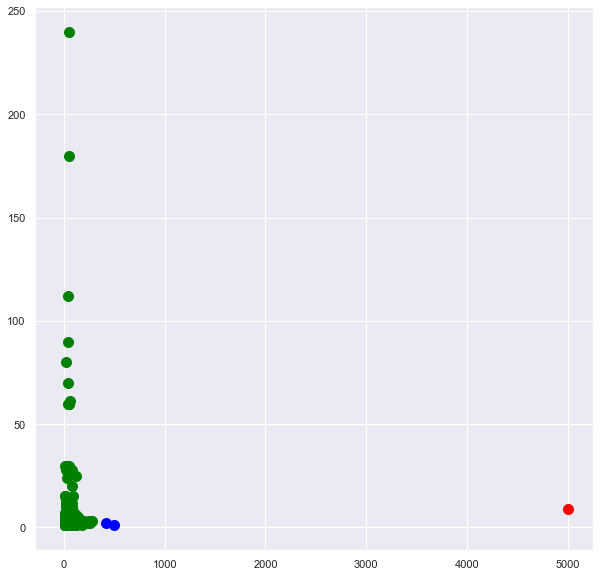

In [784]:
figure(figsize=(10,10))
plt.scatter(X[clusters[0],[0]], X[clusters[0],[1]], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters[1],[0]], X[clusters[1],[1]], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters[2],[0]], X[clusters[2],[1]], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters[3],[0]], X[clusters[3],[1]], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clusters[4],[0]], X[clusters[4],[1]], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[clusters[5],[0]], X[clusters[5],[1]], s = 100, c = 'gray', label = 'Cluster 6')
plt.scatter(X[clusters[6],[0]], X[clusters[6],[1]], s = 100, c = 'brown', label = 'Cluster 7')
plt.title('Clusters of customers in Lichtenberg')
plt.xlabel('Price')
plt.ylabel('Minimum Night')
plt.legend()
plt.show()

In [785]:
label = np.zeros(len(X))
for i in range(len(clusters)):
    label[clusters[i]] = i
print("Calinski-Harabasz", metrics.calinski_harabasz_score(X, label))
print("Silhouette Coefficient", metrics.silhouette_score(X, label, metric='euclidean'))

Calinski-Harabasz 9358.5066343182
Silhouette Coefficient 0.910467609001022


In [744]:
clusteringDataset = dataset.copy()
clusteringDataset = clusteringDataset.drop(['id', 'name', 'host_id', 'host_name' ,'latitude','longitude','last_review'], axis = 1)
print(Counter(clusteringDataset["neighbourhood_group"]))

Counter({'Friedrichshain-Kreuzberg': 4589, 'Mitte': 3821, 'Pankow': 2949, 'Neukölln': 2900, 'Tempelhof - Schöneberg': 1283, 'Charlottenburg-Wilm.': 1282, 'Lichtenberg': 529, 'Treptow - Köpenick': 477, 'Steglitz - Zehlendorf': 350, 'Reinickendorf': 199, 'Marzahn - Hellersdorf': 114, 'Spandau': 94})


In [745]:
idxNeigh = clusteringDataset[clusteringDataset['neighbourhood_group'] != "Tempelhof - Schöneberg"].index.tolist()
clusteringDataset.drop(idxNeigh, inplace = True)
clusteringDataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,0.39,1,297
28,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,25,5,21,0.21,1,329
64,Tempelhof - Schöneberg,Schöneberg-Nord,Entire home/apt,69,3,200,2.14,1,178
81,Tempelhof - Schöneberg,Schöneberg-Nord,Entire home/apt,80,3,59,0.66,1,363
84,Tempelhof - Schöneberg,Schöneberg-Süd,Entire home/apt,130,3,53,0.74,1,140
...,...,...,...,...,...,...,...,...,...
22265,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,32,2,3,3.00,6,23
22267,Tempelhof - Schöneberg,Friedenau,Private room,50,1,1,1.00,1,213
22283,Tempelhof - Schöneberg,Tempelhof,Private room,22,1,1,1.00,1,264
22300,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,27,1,2,2.00,2,9


In [746]:
X = clusteringDataset.iloc[:, [3, 4]].values
# atrA = MinMaxScaler().fit_transform(X[:,[0]])
# atrB = MinMaxScaler().fit_transform(X[:,[1]])
atrA = (X[:,[0]])
atrB = (X[:,[1]])
datanya = []
for i in range (len(atrA)):
    datanya.append([float(atrA[i]),float(atrB[i])])

In [747]:
mX = squareform(pdist(datanya))
# mX = squareform(X)
# print(mX)

In [748]:
#Inisiasi Cluster Awal
clusters = []
for i in range(len(X)):
    clusters.append([i])
# clusters
pCluster = len(X)
#nilai Cluster dapat dibuah disini
jumlahCluster = 7
while pCluster != jumlahCluster:
    close = []
    y, z = np.where( mX==np.min(mX[np.nonzero(mX)]))
    close.extend([y[-1],z[-1]])
    mustMerge = close
    #Mencari titik dari nilai terkecil pada distance matriks

    mergeClusters = []
#     print(mustMerge)
    mergeClusters.extend(clusters.pop(mustMerge[0]))
    mergeClusters.extend(clusters.pop(mustMerge[1]))                           
    clusters.append(mergeClusters)

    #Menyatukan Cluster Berdasarkan Titik

    A = mX[mustMerge[0]]
    A = np.delete(A, [mustMerge[0]], 0)
    A = np.delete(A, [mustMerge[1]], 0)
    B = mX[mustMerge[1]]
    B = np.delete(B, [mustMerge[0]], 0)
    B = np.delete(B, [mustMerge[1]], 0)
    insertThis = []
    temp = 0
    for i in range(len(A)):
    #       Start of Single Linkage
#         if A[i] <= B[i]:
#             insertThis = np.insert(insertThis, i, A[i])
#         else:
#             insertThis = np.insert(insertThis, i, B[i])
#         temp = i + 1
    #       End of Comlete Linkage

    #       Start of Comlete Linkage
            if A[i] >= B[i]:
                insertThis = np.insert(insertThis, i, A[i])
            else:
                insertThis = np.insert(insertThis, i, B[i])
            temp = i + 1
    #       End of Comlete Linkage

    #       Start of Average Linkage
#             insertThis = np.insert(insertThis,i, (A[i]+B[i])/2)
#             temp = i + 1
    #       End of Average Linkage

    insertThis = np.insert(insertThis, temp, 0)

    #Mencari nilai yang akan dimasukan ke distance Matrix

    mX = (np.delete(np.delete(mX, mustMerge[0], 0), mustMerge[0], 1))
    mX = (np.delete(np.delete(mX, mustMerge[1], 0), mustMerge[1], 1))

    #Delete distance matriks pada titik nilai minimal

    bMX = mX.copy()
    bMX = np.zeros((len(mX)+1,len(mX)+1))
    bMX[:-1,:-1] = mX
    bMX = np.insert(bMX,len(bMX)-1, insertThis, 0)
    bMX = np.delete(bMX, len(bMX)-1, axis = 0)
    bMX = np.insert(bMX,len(bMX)-1, insertThis, 1)
    bMX = np.delete(bMX, len(bMX), axis = 1)
    mX = bMX
#     print("iteration: ", pCluster)
    pCluster -= 1
    #Nilai distance matriks baru

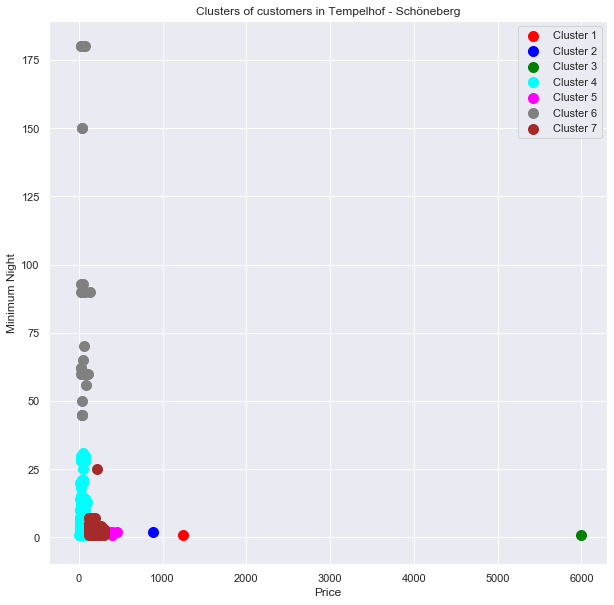

In [749]:
figure(figsize=(10,10))
plt.scatter(X[clusters[0],[0]], X[clusters[0],[1]], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters[1],[0]], X[clusters[1],[1]], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters[2],[0]], X[clusters[2],[1]], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters[3],[0]], X[clusters[3],[1]], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clusters[4],[0]], X[clusters[4],[1]], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[clusters[5],[0]], X[clusters[5],[1]], s = 100, c = 'gray', label = 'Cluster 6')
plt.scatter(X[clusters[6],[0]], X[clusters[6],[1]], s = 100, c = 'brown', label = 'Cluster 7')
plt.title('Clusters of customers in Tempelhof - Schöneberg')
plt.xlabel('Price')
plt.ylabel('Minimum Night')
plt.legend()
plt.show()

In [750]:
label = np.zeros(len(X))
for i in range(len(clusters)):
    label[clusters[i]] = i
print("Calinski-Harabasz", metrics.calinski_harabasz_score(X, label))
print("Silhouette Coefficient", metrics.silhouette_score(X, label, metric='euclidean'))

Calinski-Harabasz 9739.817378212852
Silhouette Coefficient 0.6637075121365007


In [751]:
clusteringDataset = dataset.copy()
clusteringDataset = clusteringDataset.drop(['id', 'name', 'host_id', 'host_name' ,'latitude','longitude','last_review'], axis = 1)
print(Counter(clusteringDataset["neighbourhood_group"]))

Counter({'Friedrichshain-Kreuzberg': 4589, 'Mitte': 3821, 'Pankow': 2949, 'Neukölln': 2900, 'Tempelhof - Schöneberg': 1283, 'Charlottenburg-Wilm.': 1282, 'Lichtenberg': 529, 'Treptow - Köpenick': 477, 'Steglitz - Zehlendorf': 350, 'Reinickendorf': 199, 'Marzahn - Hellersdorf': 114, 'Spandau': 94})


In [756]:
idxNeigh = clusteringDataset[clusteringDataset['neighbourhood_group'] != "Neukölln"].index.tolist()
clusteringDataset.drop(idxNeigh, inplace = True)
clusteringDataset

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
10,Neukölln,Reuterstraße,Entire home/apt,49,5,223,2.10,1,232
21,Neukölln,Reuterstraße,Entire home/apt,60,2,1,0.02,10,341
32,Neukölln,Schillerpromenade,Entire home/apt,80,10,6,0.06,1,310
57,Neukölln,Neuköllner Mitte/Zentrum,Private room,37,6,96,1.28,2,347
77,Neukölln,Reuterstraße,Entire home/apt,60,2,44,0.48,1,2
...,...,...,...,...,...,...,...,...,...
22191,Neukölln,Schillerpromenade,Private room,34,1,1,1.00,1,12
22233,Neukölln,Rixdorf,Private room,22,3,1,1.00,1,4
22235,Neukölln,Rixdorf,Private room,30,2,2,2.00,1,58
22247,Neukölln,Reuterstraße,Entire home/apt,44,1,2,2.00,1,6


In [757]:
X = clusteringDataset.iloc[:, [3, 4]].values
# atrA = MinMaxScaler().fit_transform(X[:,[0]])
# atrB = MinMaxScaler().fit_transform(X[:,[1]])
atrA = (X[:,[0]])
atrB = (X[:,[1]])
datanya = []
for i in range (len(atrA)):
    datanya.append([float(atrA[i]),float(atrB[i])])
mX = squareform(pdist(datanya))

In [758]:
#Inisiasi Cluster Awal
clusters = []
for i in range(len(X)):
    clusters.append([i])
# clusters
pCluster = len(X)
#nilai Cluster dapat dibuah disini
jumlahCluster = 7
while pCluster != jumlahCluster:
    close = []
    y, z = np.where( mX==np.min(mX[np.nonzero(mX)]))
    close.extend([y[-1],z[-1]])
    mustMerge = close
    #Mencari titik dari nilai terkecil pada distance matriks

    mergeClusters = []
#     print(mustMerge)
    mergeClusters.extend(clusters.pop(mustMerge[0]))
    mergeClusters.extend(clusters.pop(mustMerge[1]))                           
    clusters.append(mergeClusters)

    #Menyatukan Cluster Berdasarkan Titik

    A = mX[mustMerge[0]]
    A = np.delete(A, [mustMerge[0]], 0)
    A = np.delete(A, [mustMerge[1]], 0)
    B = mX[mustMerge[1]]
    B = np.delete(B, [mustMerge[0]], 0)
    B = np.delete(B, [mustMerge[1]], 0)
    insertThis = []
    temp = 0
    for i in range(len(A)):
    #       Start of Single Linkage
#         if A[i] <= B[i]:
#             insertThis = np.insert(insertThis, i, A[i])
#         else:
#             insertThis = np.insert(insertThis, i, B[i])
#         temp = i + 1
    #       End of Comlete Linkage

    #       Start of Comlete Linkage
            if A[i] >= B[i]:
                insertThis = np.insert(insertThis, i, A[i])
            else:
                insertThis = np.insert(insertThis, i, B[i])
            temp = i + 1
    #       End of Comlete Linkage

    #       Start of Average Linkage
#             insertThis = np.insert(insertThis,i, (A[i]+B[i])/2)
#             temp = i + 1
    #       End of Average Linkage

    insertThis = np.insert(insertThis, temp, 0)

    #Mencari nilai yang akan dimasukan ke distance Matrix

    mX = (np.delete(np.delete(mX, mustMerge[0], 0), mustMerge[0], 1))
    mX = (np.delete(np.delete(mX, mustMerge[1], 0), mustMerge[1], 1))

    #Delete distance matriks pada titik nilai minimal

    bMX = mX.copy()
    bMX = np.zeros((len(mX)+1,len(mX)+1))
    bMX[:-1,:-1] = mX
    bMX = np.insert(bMX,len(bMX)-1, insertThis, 0)
    bMX = np.delete(bMX, len(bMX)-1, axis = 0)
    bMX = np.insert(bMX,len(bMX)-1, insertThis, 1)
    bMX = np.delete(bMX, len(bMX), axis = 1)
    mX = bMX
#     print("iteration: ", pCluster)
    pCluster -= 1
    #Nilai distance matriks baru

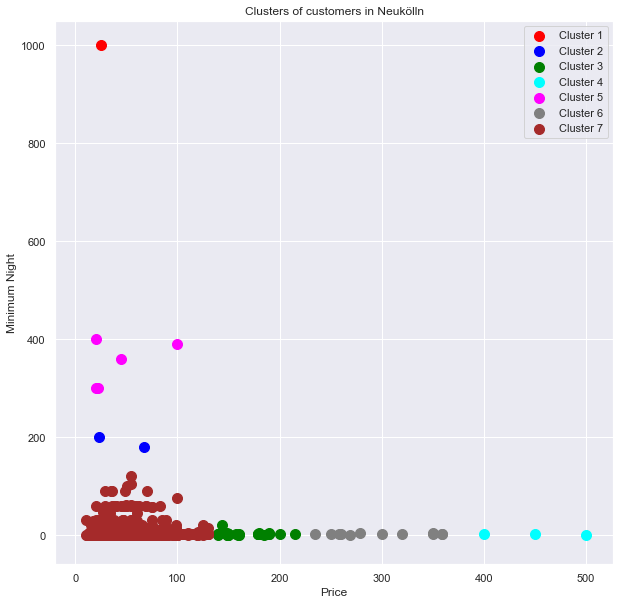

In [759]:
figure(figsize=(10,10))
plt.scatter(X[clusters[0],[0]], X[clusters[0],[1]], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters[1],[0]], X[clusters[1],[1]], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters[2],[0]], X[clusters[2],[1]], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters[3],[0]], X[clusters[3],[1]], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clusters[4],[0]], X[clusters[4],[1]], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[clusters[5],[0]], X[clusters[5],[1]], s = 100, c = 'gray', label = 'Cluster 6')
plt.scatter(X[clusters[6],[0]], X[clusters[6],[1]], s = 100, c = 'brown', label = 'Cluster 7')
plt.title('Clusters of customers in Neukölln')
plt.xlabel('Price')
plt.ylabel('Minimum Night')
plt.legend()
plt.show()

In [761]:
label = np.zeros(len(X))
for i in range(len(clusters)):
    label[clusters[i]] = i
print("Calinski-Harabasz", metrics.calinski_harabasz_score(X, label))
print("Silhouette Coefficient", metrics.silhouette_score(X, label, metric='euclidean'))

Calinski-Harabasz 1020.8242406440356
Silhouette Coefficient 0.7584940362235779


In [806]:
converttoCSV = dataset.copy()
converttoCSV = converttoCSV.drop(['id', 'name', 'host_id', 'host_name' ,'latitude','longitude','last_review'], axis = 1)
converttoCSV.to_csv('air_bnb_case1.csv')
#export bentuk CSV hasil preprocessing